[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Answers%20to%20Exercises/Python/BinomialExerciseAnswers.ipynb)

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [11]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from numpy import matlib

# Neuroscience Example: Quantal Release

Below are answers to the exercises described [here](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

## Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [7]:
# Answer to Exercise 1
n = 10                          # Number of available quanta
pRelease = 0.2                  # Release probabilty 
k = np.arange(11)               # Possible values of k (measured events)
probs = binom.pmf(k,n,pRelease) # Array of probabilities of obtaining those values of k, given n and prelease

# Print it nicely
for A, B in zip(k, probs):
    print(f'k={A:2d}: p={B:.2f}')

k= 0: p=0.11
k= 1: p=0.27
k= 2: p=0.30
k= 3: p=0.20
k= 4: p=0.09
k= 5: p=0.03
k= 6: p=0.01
k= 7: p=0.00
k= 8: p=0.00
k= 9: p=0.00
k=10: p=0.00


## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood. 

In [8]:
# Answer to Exercise 2
n = 14  # Number of available quanta
k = 8   # Measured number of released quanta

# Compute the pmf from a range of p values from 0.1 to 1.0 in 0.1-size steps
ps = np.arange(0.1, 1.0, 0.1)
probs = [binom.pmf(k,n,x) for x in ps]

# Print it nicely
for A, B in zip(ps, probs):
    print(f'p={A:.1f}: binomial probability={B:.4f}')

p=0.1: binomial probability=0.0000
p=0.2: binomial probability=0.0020
p=0.3: binomial probability=0.0232
p=0.4: binomial probability=0.0918
p=0.5: binomial probability=0.1833
p=0.6: binomial probability=0.2066
p=0.7: binomial probability=0.1262
p=0.8: binomial probability=0.0322
p=0.9: binomial probability=0.0013


## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

total probability = 1.24e-07, total log probability = -15.905


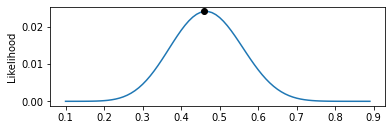

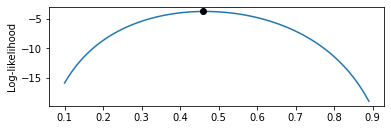

In [12]:
# Answer to Exercise 3
# Likelihood and log-likelihood for sample size = 2, assumed pRelease=0.1
n1 = 14             # Number of available quanta, experiment 1
n2 = 14             # Number of available quanta, experiment 2
k1 = 8              # Measured number of released experiment 1
k2 = 5              # Measured number of released experiment 2
pRelease = 0.1      # Assumed probability of release
prob1 = binom.pmf(k1,n1,pRelease) # Probabilty of obtaining data 1 (k1) given n1, prelease
prob2 = binom.pmf(k2,n2,pRelease) # Probabilty of obtaining data 2 (k2) given n2, prelease
total_probability = prob1 * prob2 # Assume independence and compute product
total_log_probability = np.log(prob1) + np.log(prob2) # Assume independence and compute sum
print(f'total probability = {total_probability:.3}, total log probability = {total_log_probability:.3f}')

# likelihood and log-likelihood functions for sample size = 2
ps = np.arange(0.1, 0.9, 0.01)      # Array of possible release probabilities -- compute at a resolution of 0.01

# Get value of the binomial distribution for each combination of k, n, p. The 
#   output is a matrix with two columns: 1) n1, k1  2) n2, k2. 
#   Rows are different values of p
probs = binom.pmf(matlib.repmat([k1, k2], ps.size, 1), 
                  matlib.repmat([n1, n2], ps.size, 1), 
                  matlib.repmat(np.asmatrix(ps).T, 1, 2))

# The likelihood function is the product of likelihoods (assuming independence)
plt.subplot(211)
plt.ylabel('Likelihood')
likelihood_function = np.prod(probs,1)          # Compute the product for each row 
plt.plot(ps, likelihood_function)               # Plot it
max_likelihood = np.amax(likelihood_function)   #  Get the maximum likelihood
plt.plot(ps[likelihood_function==max_likelihood], max_likelihood, 'ko')
plt.show()

# The log-likelihood function is the sum of log-likelihoods (assuming independence)
plt.subplot(212)
plt.ylabel('Log-likelihood')
log_likelihood_function = np.sum(np.log(probs),1); # Compute the sum for each row
plt.plot(ps, log_likelihood_function)               # Plot it
max_log_likelihood = np.amax(log_likelihood_function)      # Get the maximum likelihood
plt.plot(ps[log_likelihood_function==max_log_likelihood], max_log_likelihood, 'ko')
plt.show()

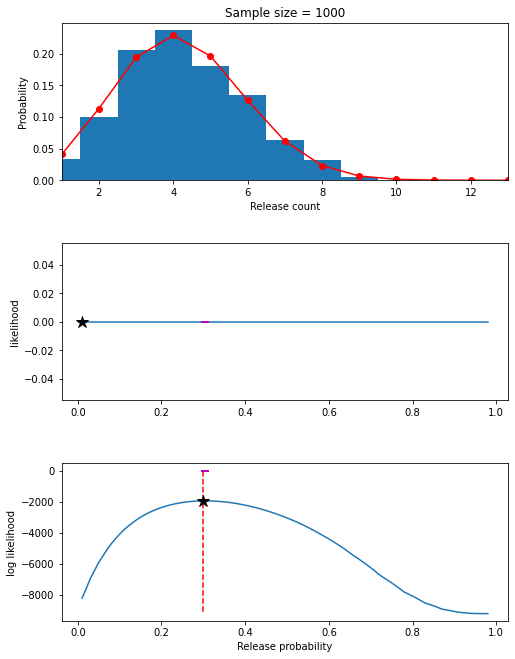

In [14]:
# Likelihood and log-likelihood functions for different sample sizes.

# The code below will produce three plots that will update automatically for 
#   different sample sizes. You should see that as sample size increases, the 
#   ability to estimate the true value of the probability of release increases. 
#   You will also see an advantage of using log-likelihood over likelihood: as 
#   the number of samples increases, the total likelihood (the product of the 
#   likeilihoods associated with each measurement in the sample) eventually 
#   disappears, because Matlab can't handle the really small numbers (note that 
#   as the sample size increases, the number of all possible experimental 
#   outcomes you could measure gets really, really big, so the total likelihood 
#   of any GIVEN outcome gets really, really small). The three plots are:

# TOP: normalized histogram of simulated experimental outcomes 
#   (i.e., simulated values of k for the given release probability and sample 
#   size), along with the theoretical binomial distribution

# MIDDLE: likelihood function, p(simulated data | pRelease)
#  Also shown are the maximum likelihood (peak of the likelihood function) 
#   determined directly from the plotted likelihood function plus the value 
#   (and 95% confidence intervals) computed using Matlab's "binofit" function 
#   fit to the simulated data, plus the value of pRelease used in the simulations.

# BOTTOM: Same as in the middle panel, but using the log-likelihood function
fig, axs = plt.subplots(3, 1, figsize=(8, 11))
fig.subplots_adjust(hspace=0.4)

n = 14                              # number of available quanta
p_release = 0.3                      # assumed probability of release
ks = np.arange(0, n)                # possible values of k
ps = np.arange(0.01, 0.99, 0.01)    # possible release probabilities
#pdat = zeros(length(ps), 2)  # pre-allocate matrix to hold likelihoods per p
TINY = 0.0001                       # to avoid multiplying/taking logs of really small numbers
for sample_size in np.logspace(0,3,30):  # try different sample sizes

    # # Simulate experiments -- get simulated counts for the given n, pRelease, and number of experiments
    simulated_counts = binom.rvs(n, p_release, size=int(np.round(sample_size)))

    # Plot experiment, theoretical binomial pdf
    plt.axes(axs[0]).cla()
    plt.title(f'Sample size = {int(np.round(sample_size))}')
    plt.ylabel('Probability')
    plt.xlabel('Release count')
    plt.xlim((ks[1], ks[-1]))

    # Plot normalized histogram of simulated counts
    plt.hist(simulated_counts, np.arange(-0.5, n+0.5, 1), density=True)

    # Plot theoretical pdf
    plt.plot(ks, binom.pmf(ks, n, p_release), 'ro-')

    # compute (log) lik for each p
    likelihoods = np.zeros((ps.size, 2))

    # Loop through each possible value of release probability
    for p_index, p_value in enumerate(ps):
        
        # Compute the probabilities of obtaining the data, given the assumed release probabilty
        probs = binom.pmf(simulated_counts, n, p_value)
        
        # Avoid really small numbers
        probs[probs<TINY] = TINY

        # Save product of likelihoods and sum of log likelihoods
        likelihoods[p_index, 0] = np.prod(probs)
        likelihoods[p_index, 1] = np.sum(np.log(probs))

    # Get the 95% onfidence intervals for the maximum likelihood binomial fit 
    #   value of p. This uses a trick that assumes all of the measurements are 
    #   independent and lumps them together as if they were one big experiment.
    ci_low, ci_upp = proportion.proportion_confint(np.sum(simulated_counts), sample_size*n)

    # Plot product of likelihoods
    plt.axes(axs[1]).cla()
    plt.ylabel('likelihood')

    # Plot the likelihood function (product of likelihoods)
    plt.plot(ps, likelihoods[:,0])

    # Find the maximum
    max_lik = np.max(likelihoods[:,0])

    # Show the actual pRelease value as a dashed line
    plt.plot([p_release, p_release], [0, max_lik], 'r--')

    # Show the 95% confidence intervals from the fits 
    plt.plot([ci_low, ci_upp], [max_lik, max_lik], 'm-', linewidth=2)

    # Show the maximum value of our computed likelihood function   
    plt.plot(ps[np.atleast_1d(np.argmax(likelihoods[:,0]))[0]], max_lik, 'k*', markersize=12)

    # plot sum of log-likelihoods
    plt.axes(axs[2]).cla()
    plt.ylabel('log likelihood')
    plt.xlabel('Release probability')
    # plt.axis((0, 1, np.log(TINY)*1000, 0))

    # Plot the likelihood function (sum of log-likelihoods)
    plt.plot(ps, likelihoods[:,1])

    # Find the maximum
    max_loglik = np.max(likelihoods[:,1])

    # Show the actual pRelease value as a dashed line
    plt.plot([p_release, p_release], [0, np.min(likelihoods[:,1])], 'r--')

    # Show the 95% confidence intervals from the fits 
    plt.plot([ci_low, ci_upp], [max_lik, max_lik], 'm-', linewidth=2)

    # Show the maximum value of our computed likelihood function
    plt.plot(ps[np.atleast_1d(np.argmax(likelihoods[:,1]))[0]], max_loglik, 'k*', markersize=12)

    # Clear for next plot
    display(fig)
    clear_output(wait=True)

## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
3 | 7
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01? 

BONUS: Use a fitting procedure to find $\hat{p}$.

In [13]:
# Answers to Exercise 4

# Set up the experiment
counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0] # The experimental outcomes
n = len(counts)-1               # Number of available quanta in each experiment
ks = np.arange(n+1)             # Possible values of k
ps = np.arange(0, 1.01, 0.01)   # Possible values of release probability, as a column vector

# Compute the value of the binomial distribution for each possible value of k, n, p. Make a matrix in which:
#     - columns correspond to different values of p
#     - rows correspond to different values of k
probs = binom.pmf(matlib.repmat(ks, ps.size, 1), n, matlib.repmat(np.asmatrix(ps).T, 1, ks.size))

# Make a matrix of outcomes (in rows) that are repeated along the columns so we can use them to compute likelihoods for each possible value of release probability (p)
counts_matrix = matlib.repmat(counts, ps.size, 1)

# Compute likelihood function, which takes the product of all likelihoods associated with each measured outcome. 
likelihood_fcn = np.prod(probs ** counts_matrix, axis=1)
p_hat_from_liklihood = ps[np.argmax(likelihood_fcn)]

# Compute log-likelihood function, which takes the sum of all log-likelihoods associated with each measured outcome.
probs[probs<0.0001]=0.0001
log_likelihood_fcn = np.sum(np.log(probs) * counts_matrix, axis=1)
p_hat_from_log_likelihood = ps[np.argmax(log_likelihood_fcn)]

# Compute p directly from the empirical data
p_empirical = np.sum(counts*ks)/(np.sum(counts)*n)

# Show the results
print(f'p = {p_hat_from_liklihood:.3f} from likelihood, {p_hat_from_log_likelihood:.3f} from log-likelihood, {p_empirical:.3f} directly')

p = 0.380 from likelihood, 0.380 from log-likelihood, 0.382 directly


## Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute $\hat{p}$. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [15]:
# Answer to Exercise 5
n = 14               # Number of available quanta
k = 7                # Measured number of released quanta
p_hat = k/n           # Compute maximum-likelihood value of p
p_null = 0.3;         #  Null hypothesis p

# Get p-value for one-sided test that you would have gotten k or more successes in n trials for the given null hypothesis p
p_value = st.binom_test(k, n, p_null, alternative='greater')    

# Print result. Note that p>0.05, so cannot rule out that we would have gotten this measurement by chance under the null hypothesis
print(f'p value for the null hypothesis that p={p_null:.1f} = {p_value:.4f}')

p value for the null hypothesis that p=0.3 = 0.0933


## Bonus Exercise

These data are reproduced from Tables 1 and 2 of Johnson and Wernig. Note that *nx* indicates the number of trials ("release events") with *x* measured events. Each row is a separate experiment (don't worry about the ordering, which here is reproduced as it is in the paper).

Temp (°C)	| n0	| n1	| n2	| n3	| n4	| n5+
--- | --| --- | --- | --- | --- | ---
4.0	| 615	| 206	| 33	| 2	| 0	| 0
3.5	| 604	| 339	| 94	| 11	| 2	| 0
0.0 | 	332	| 126	| 21	| 1	| 0	| 0
2.0	| 573	| 443	| 154	| 28	| 2	| 0
6.5	| 172	| 176	| 89	| 12	| 1	| 0
3.0	| 80	| 224	| 200	| 32	| 4	| 0

You can probably already see that some experiments resulted in primarily zero or one events per trial (e.g., the top experiment), whereas others tended to have more events (e.g., the bottom experiment).

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution. To get the predicted distribution (i.e., the probabilities associated with each value of *k* from Eq. 1, given the release probability p and the number of available quanta *n*), you need to determine both *k* and *n* from the empirical measurements. To determine *p*, use Eq. 5 in the paper: $p=1-\frac{\sigma ^{2}}{m}$

where $\sigma ^{2}$ is the variance and *m* is the mean of the trial-by-trial counts that can be determined from the data. To determine *n*, compute *m*/*p* (because *m* = *n* x *p*).

As an added bonus, also include the predicted Poisson distribution, which can be computed using only the mean number of events (*m*, described above).



row=0, goodness-of-fits, binomial p=0.992, Poisson p=0.950
row=1, goodness-of-fits, binomial p=0.849, Poisson p=0.833
row=2, goodness-of-fits, binomial p=0.999, Poisson p=0.891
row=3, goodness-of-fits, binomial p=0.988, Poisson p=0.200
row=4, goodness-of-fits, binomial p=0.760, Poisson p=0.015
row=5, goodness-of-fits, binomial p=1.000, Poisson p=0.000


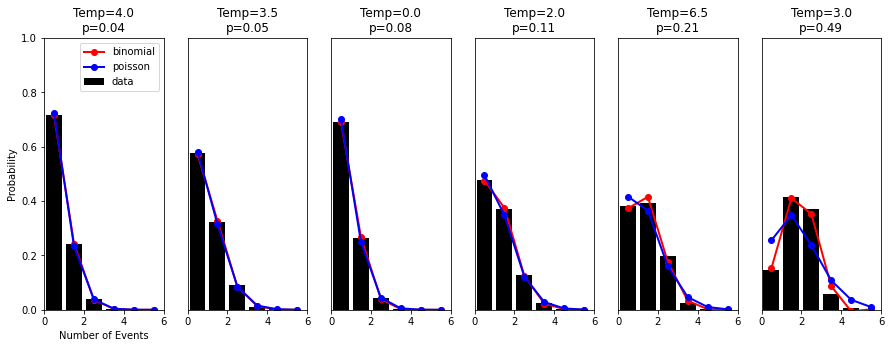

In [16]:
# Bonus exercise
# Set up the figure
fig = plt.figure(figsize=(15,5))
# The data table
data = np.asarray([
   [4.0, 615, 206, 33,  2,  0, 0],
   [3.5, 604, 339, 94,  11, 2, 0],
   [0.0, 332, 126, 21,  1,  0, 0],
   [2.0, 573, 443, 154, 28, 2, 0],
   [6.5, 172, 176, 89,  12, 1, 0],
   [3.0, 80,  224, 200, 32, 4, 0]])

xs = np.arange(6) # x-axis

# For each session
for index, row in enumerate(data):

    # Compute relevant variables
    nx = row[1:]                  # the count data
    N  = np.sum(nx)               # the total number of trials
    m  = np.sum(nx[1:]*xs[1:])/N  # mean
    v  = np.sum((xs-m)**2*nx)/N   # variance
    p  = 1 - (v/m)                # release probabilty
    n  = m/p                      # available quanta per trial

    # Set up the plot
    ax = plt.subplot(1, len(data), index+1)
    plt.bar(xs+0.5, nx/N, facecolor='k')

    # Compute the binomial probabilities according to the equations at the top of p. 762
    binomial_counts = np.zeros(xs.size)
    binomial_counts[0] = np.sum(nx)*(1-p)**n

    for idx in np.arange(1, binomial_counts.size):
        binomial_counts[idx] = binomial_counts[idx-1]*(m-p*(idx-1))/((idx)*(1-p))
    binomial_counts = np.round(binomial_counts)

    # Normalize for pdf and plot
    plt.plot(xs+0.5, binomial_counts/np.sum(binomial_counts), 'ro-', markerfacecolor='r', linewidth=2)

    # Get Possion pdf
    pps = poisson.pmf(xs, m)
    plt.plot(xs+0.5, pps, 'bo-', markerfacecolor='b', linewidth=2)

    # Compute Chi-2 goodness-of-fit, k-1 degrees of freedom for binomial and Poisson
    # For binomial, use a little cheat: assume all bins contribute even when binomialCounts=0 (because nx is always zero then, too)
    with np.errstate(invalid='ignore', divide='ignore'):
        pb = 1-chi2.cdf(np.nansum(np.divide((nx-binomial_counts)**2, binomial_counts)), binomial_counts.size-1)
        poisson_counts = np.round(pps*N)
        pp = 1-chi2.cdf(np.nansum(np.divide((nx-poisson_counts)**2, poisson_counts)), poisson_counts.size-1)
    print(f'row={index}, goodness-of-fits, binomial p={pb:.3f}, Poisson p={pp:.3f}')

    # Show titles,labels, legend
    plt.axis([0, 6, 0, 1])
    plt.title(f'Temp={row[0]:.1f}\np={p:.2f}')
    if index == 0:
        plt.xlabel('Number of Events')
        plt.ylabel('Probability')
        plt.legend(('binomial', 'poisson', 'data'))
    else:
        ax.get_yaxis().set_ticks([])

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania